In [3]:
import sys

sys.path.append("../")
sys.path.append("../data/")
sys.path.append("../model_evaluation")

In [8]:
import pandas as pd

data = pd.read_csv("../results/gpt_pet_t2t.csv")
data.dropna(inplace=True)
t2t_1_t2t, t2t_2_t2t, m2m_1_t2t, m2m_2_t2t = (
    data["t2t_eval_1"],
    data["t2t_eval_2"],
    data["m2m_eval_1"],
    data["m2m_eval_2"],
)
data = pd.read_csv("../results/gpt_petm2m.csv")
t2t_1_m2m, t2t_2_m2m, m2m_1_m2m, m2m_2_m2m = (
    data["t2t_eval_1"],
    data["t2t_eval_2"],
    data["m2m_eval_1"],
    data["m2m_eval_2"],
)

/var/folders/nn/rsh9pz9s4mj886ccd7vnn0yc0000gn/T/ipykernel_1242/1829733498.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


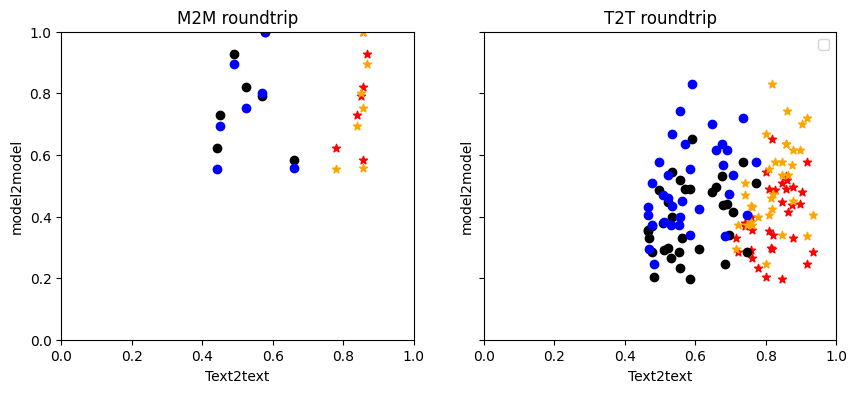

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

axs[0].scatter(t2t_1_m2m.values, m2m_1_m2m.values, marker="*", color="red")
axs[0].scatter(t2t_1_m2m.values, m2m_2_m2m.values, marker="*", color="orange")
axs[0].scatter(t2t_2_m2m.values, m2m_1_m2m.values, marker="o", color="black")
axs[0].scatter(t2t_2_m2m.values, m2m_2_m2m.values, marker="o", color="blue")
axs[0].set_title("M2M roundtrip")
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)
axs[0].set_xlabel("Text2text")
axs[0].set_ylabel("model2model")

axs[1].scatter(t2t_1_t2t.values, m2m_1_t2t.values, marker="*", color="red")
axs[1].scatter(t2t_1_t2t.values, m2m_2_t2t.values, marker="*", color="orange")
axs[1].scatter(t2t_2_t2t.values, m2m_1_t2t.values, marker="o", color="black")
axs[1].scatter(t2t_2_t2t.values, m2m_2_t2t.values, marker="o", color="blue")
axs[1].set_title("T2T roundtrip")
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)
axs[1].set_xlabel("Text2text")
axs[1].set_ylabel("model2model")

plt.legend()

In [10]:
from scipy.stats import pearsonr

print(pearsonr(list(t2t_1_t2t.values), list(m2m_1_t2t.values)))
print(pearsonr(list(t2t_1_t2t.values), list(m2m_2_t2t.values)))
print(pearsonr(list(t2t_2_t2t.values), list(m2m_1_t2t.values)))
print(pearsonr(list(t2t_2_t2t.values), list(m2m_2_t2t.values)))

PearsonRResult(statistic=0.32224007856288145, pvalue=0.06308239652055708)
PearsonRResult(statistic=0.4429375029781078, pvalue=0.008705090622030561)
PearsonRResult(statistic=0.300707133262264, pvalue=0.08397475471106369)
PearsonRResult(statistic=0.3743599231877539, pvalue=0.02916591718144908)


In [11]:
print(pearsonr(list(t2t_1_m2m.values), list(m2m_1_m2m.values)))
print(pearsonr(list(t2t_1_m2m.values), list(m2m_2_m2m.values)))
print(pearsonr(list(t2t_2_m2m.values), list(m2m_1_m2m.values)))
print(pearsonr(list(t2t_2_m2m.values), list(m2m_2_m2m.values)))

PearsonRResult(statistic=0.5456232730504208, pvalue=0.2052030177559446)
PearsonRResult(statistic=0.5871581969658451, pvalue=0.1657402515271738)
PearsonRResult(statistic=-0.039326814888961864, pvalue=0.9332883414929014)
PearsonRResult(statistic=0.0627065254390525, pvalue=0.8937552667690282)


In [46]:
import os
import json

model_path = "../data/pet/ground_json/"
model_files = os.listdir(model_path)
for i, model_file in enumerate(model_files):

    with open(model_path + model_file, "r") as f:
        model = json.load(f)
        print(model["pools"])

[{'id': 'sid-610131CD-8B0B-4DAF-B6AF-8A44295D5350', 'name': 'Customer', 'lanes': [{'id': 'sid-EF0DCEFC-820D-49A8-9A71-490EB5BDC40A', 'name': '', 'elemRefs': ['sid-2DD86BFF-FFBC-4FC5-A806-674B281FE464', 'sid-58E61616-24DF-4A7A-ADF8-A0E3E1D8272B', 'sid-3DF18E5B-A634-4252-BC5E-3C6161AE6E41', 'sid-AE629EF1-9055-498B-9991-E20B31408A7C', 'sid-199EC0F8-6132-43B0-AD6F-4115AD26C037', 'sid-4D2C70A9-9E21-485A-890F-B97BF71BB935', 'sid-C2D2475E-5F44-478E-99F5-CAC639365391', 'sid-D9079180-1222-411B-A83F-2DF0738F6884']}]}, {'id': 'sid-F255058F-6616-4B5F-87B8-7402E92940A5', 'name': 'Company', 'lanes': [{'id': 'sid-07CEEECC-3566-4122-B487-4A71DC717059', 'name': 'Customer Service Department', 'elemRefs': ['sid-6FA43061-349D-4823-B724-0F577743FA77', 'sid-B80453D7-1D1E-4646-A8F4-0A94299D9E31', 'sid-B0E34A45-3A66-48E3-A18E-E8F0986C5BC7', 'sid-52E043FA-D640-46BD-8417-6AE302C5DF06', 'sid-76AFD8FE-63A8-4354-BC76-9D95A64B2C9E', 'sid-AC0E8F10-ACE4-4376-8A5B-BD5BF651B6B9', 'sid-D6D784B2-4FC1-4F30-8116-ACA56D900A